In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning, DataConversionWarning

# # Ignore specific warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# warnings.filterwarnings("ignore", category=DataConversionWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)
# warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [3]:
dataset_path = './final_dataset_BFP .csv'
df = pd.read_csv(dataset_path)

In [4]:
df.head(10)

,Weight,Height,BMI,Body Fat Percentage,BFPcase,Gender,Age,BMIcase,Exercise Recommendation Plan
0,76.811975,1.820521,23.175956,18.281148,Acceptable,Male,29,normal,4
1,77.721154,1.945498,20.534184,13.731021,Fitness,Male,23,normal,4
2,87.558726,1.742754,28.828859,42.304631,Obese,Female,57,over weight,5
3,89.473356,1.758318,28.940017,27.958021,Obese,Male,41,over weight,5
4,69.963943,1.722570,23.578732,16.464478,Fitness,Male,19,normal,4
5,62.913627,1.498504,28.017479,34.200974,Obese,Female,26,over weight,5
6,53.598341,1.864738,15.414007,9.886809,Athletes,Male,33,sever thinness,1
7,105.078061,1.743099,34.583405,50.590086,Obese,Female,63,severe obese,7
8,87.698358,1.818983,26.505403,39.976483,Obese,Female,59,severe obese,7
9,74.798901,1.710349,25.569717,29.433660,Obese,Male,65,over weight,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Weight                        5000 non-null   float64
 1   Height                        5000 non-null   float64
 2   BMI                           5000 non-null   float64
 3   Body Fat Percentage           5000 non-null   float64
 4   BFPcase                       5000 non-null   object 
 5   Gender                        5000 non-null   object 
 6   Age                           5000 non-null   int64  
 7   BMIcase                       5000 non-null   object 
 8   Exercise Recommendation Plan  5000 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 351.7+ KB


In [6]:
df.isnull().sum()

Weight                          0
Height                          0
BMI                             0
Body Fat Percentage             0
BFPcase                         0
Gender                          0
Age                             0
BMIcase                         0
Exercise Recommendation Plan    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df

,Weight,Height,BMI,Body Fat Percentage,BFPcase,Gender,Age,BMIcase,Exercise Recommendation Plan
0,76.811975,1.820521,23.175956,18.281148,Acceptable,Male,29,normal,4
1,77.721154,1.945498,20.534184,13.731021,Fitness,Male,23,normal,4
2,87.558726,1.742754,28.828859,42.304631,Obese,Female,57,over weight,5
3,89.473356,1.758318,28.940017,27.958021,Obese,Male,41,over weight,5
4,69.963943,1.722570,23.578732,16.464478,Fitness,Male,19,normal,4
...,...,...,...,...,...,...,...,...,...
4995,87.003054,1.902891,24.027404,16.772884,Fitness,Male,18,normal,4
4996,92.121555,1.779346,29.096464,30.215757,Obese,Male,50,over weight,5
4997,105.298845,1.972883,27.053345,31.214014,Obese,Male,65,over weight,5
4998,90.411999,1.803409,27.799528,29.579434,Obese,Male,54,over weight,5


## Data Preparation and Preprocessing

In [9]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['BFPcase'] = label_encoder.fit_transform(df['BFPcase'])
df['BMIcase'] = label_encoder.fit_transform(df['BMIcase'])

scaler = StandardScaler()
numerical_features = ['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'Age']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head(10)

,Weight,Height,BMI,Body Fat Percentage,BFPcase,Gender,Age,BMIcase,Exercise Recommendation Plan
0,-0.198505,0.450598,-0.504882,-1.082427,0,1,-0.925599,2,4
1,-0.145521,1.422264,-0.976563,-1.503616,2,1,-1.360514,2,4
2,0.427778,-0.154020,0.504430,1.141343,3,0,1.104001,4,5
3,0.539356,-0.033009,0.524277,-0.186672,3,1,-0.055771,4,5
4,-0.597584,-0.310940,-0.432967,-1.250589,2,1,-1.650457,2,4
5,-1.008451,-2.052992,0.359560,0.391216,3,0,-1.143056,4,5
6,-1.551313,0.794377,-1.890757,-1.859461,1,1,-0.635656,5,1
7,1.448743,-0.151331,1.531889,1.908299,3,0,1.538916,6,7
8,0.435915,0.438639,0.089582,0.925835,3,0,1.248973,6,7
9,-0.315819,-0.405959,-0.077482,-0.050078,3,1,1.683887,4,5


## Exploratory Data Analysis

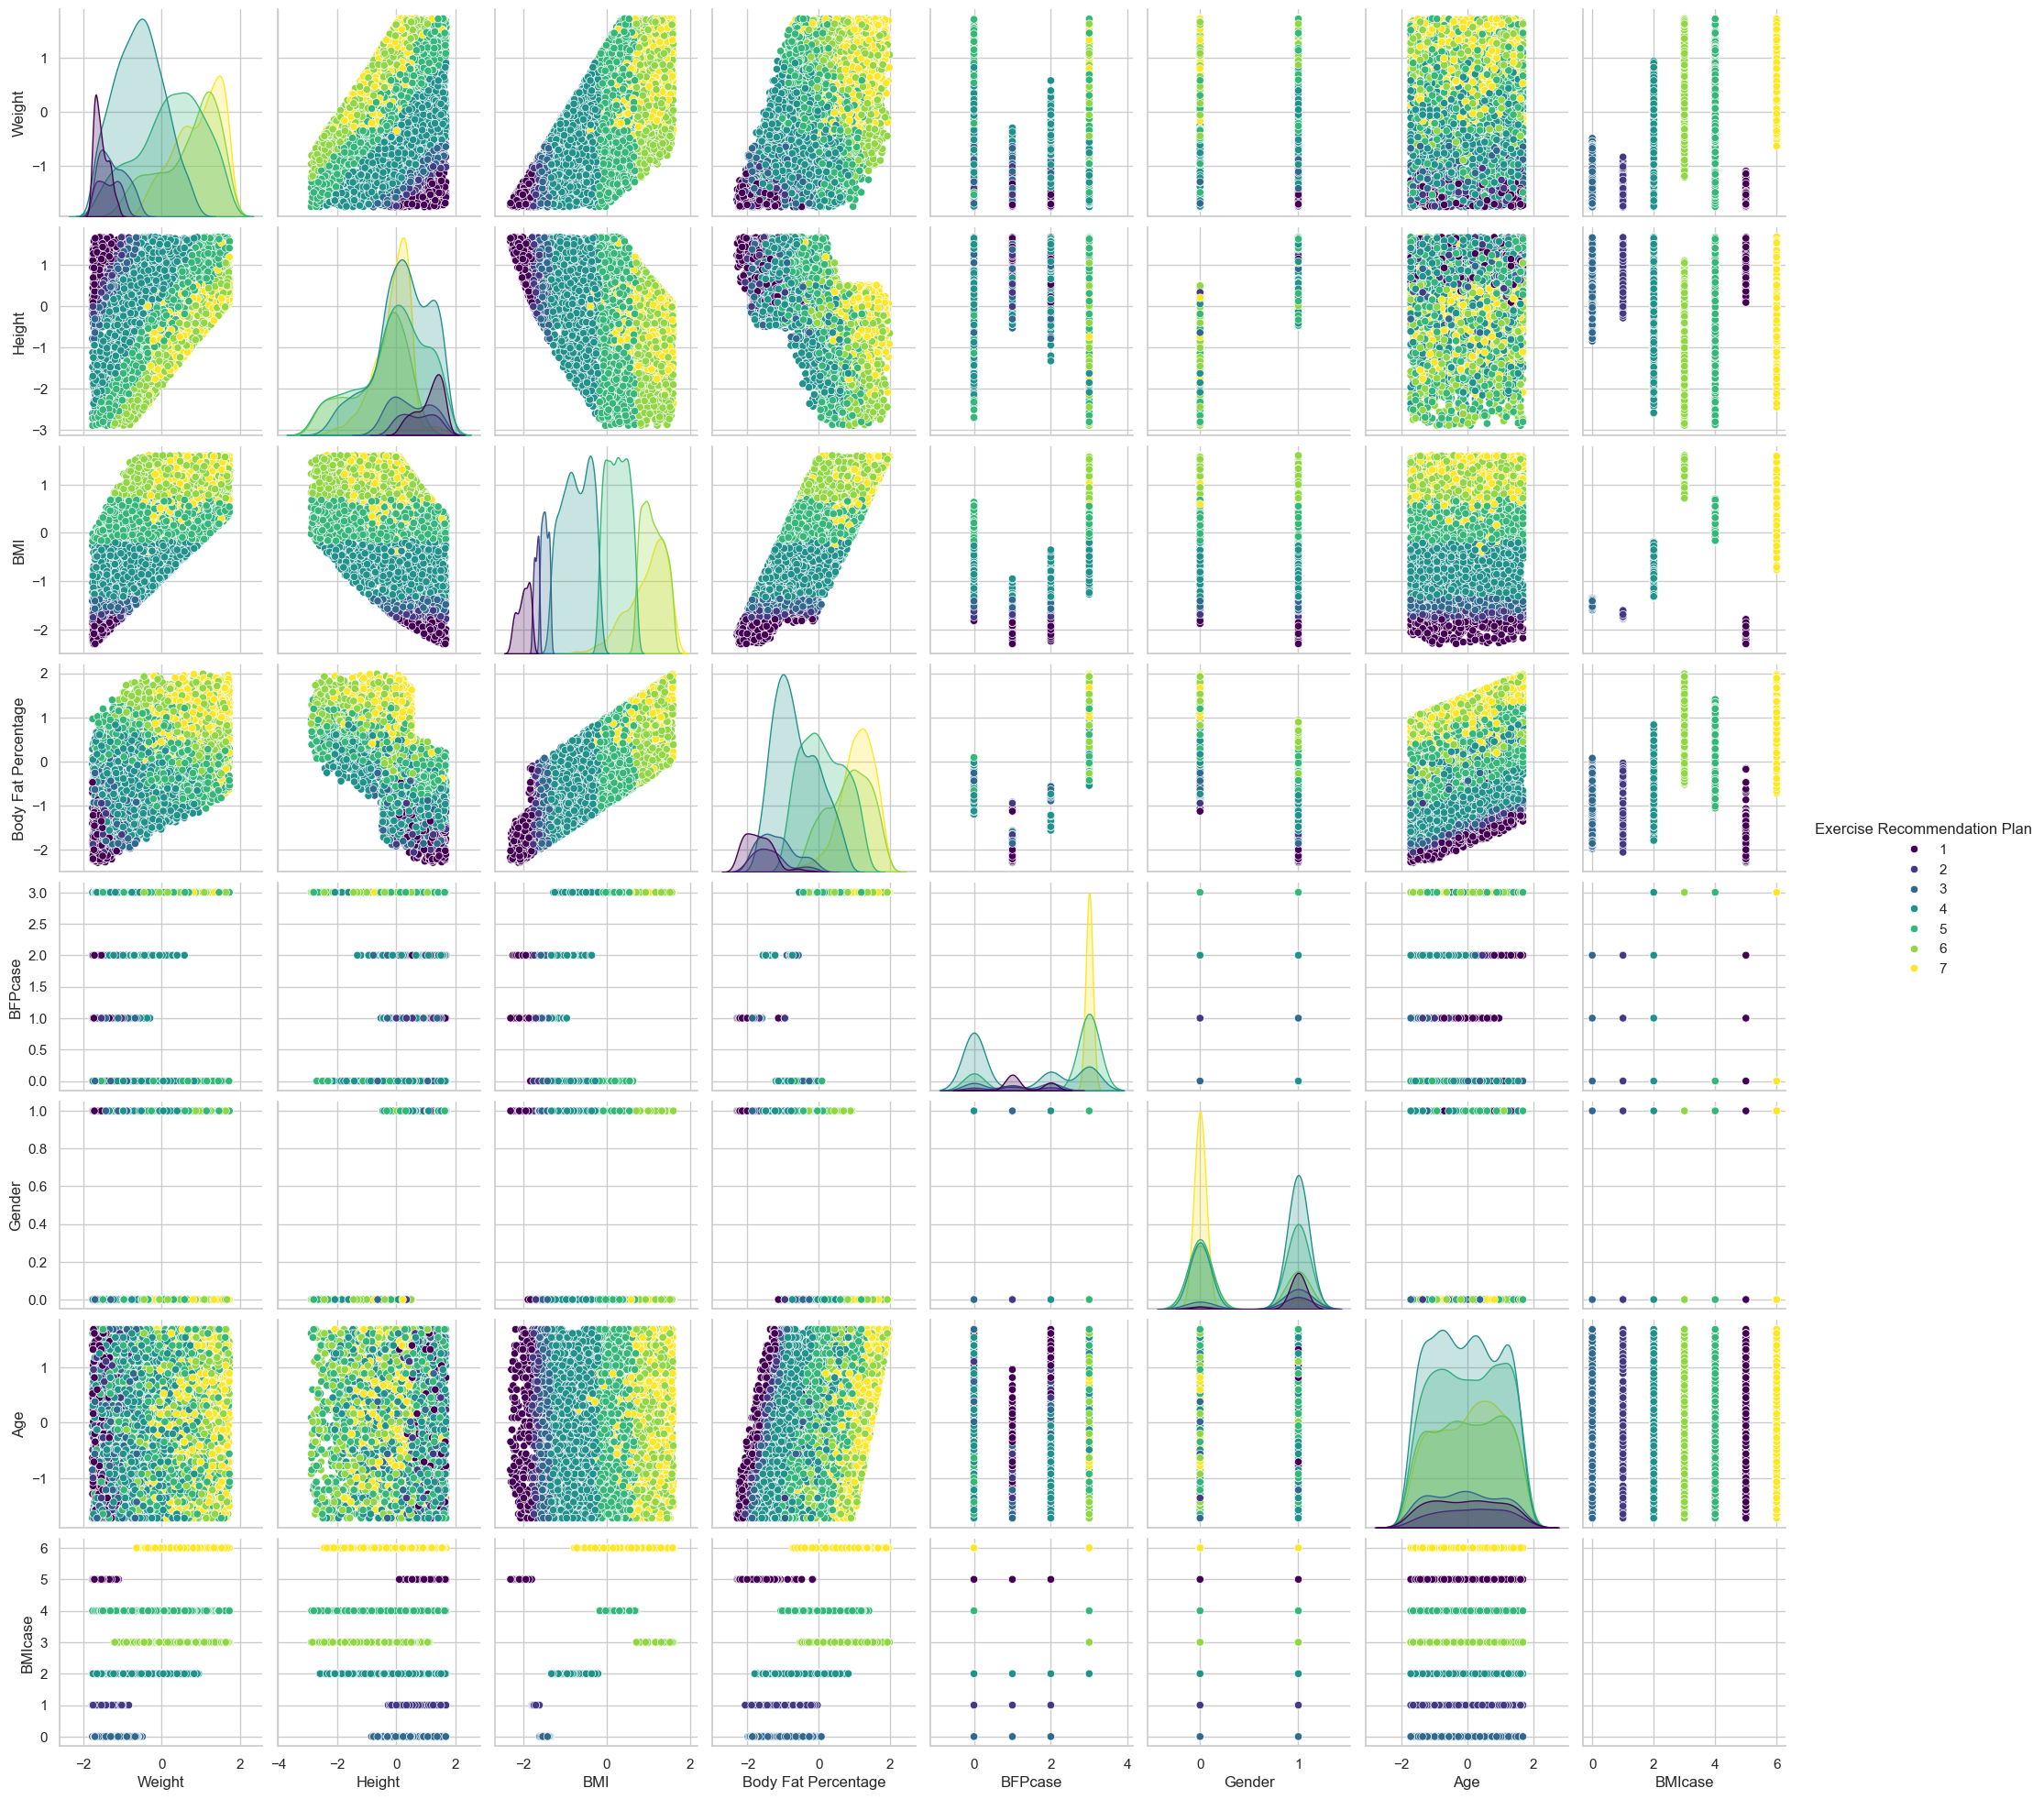

In [10]:
sns.set_theme(style="whitegrid")

sns.pairplot(df, hue='Exercise Recommendation Plan', palette='viridis')
plt.savefig(fname='fig')
plt.show()

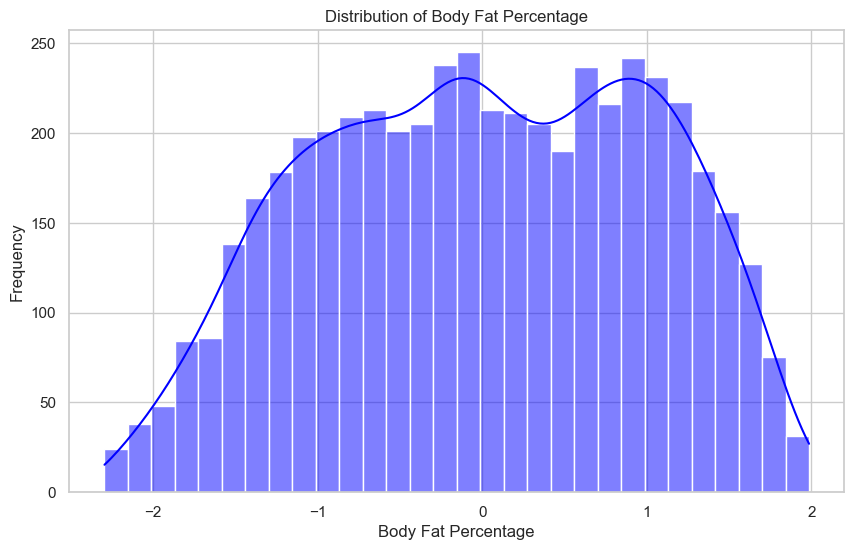

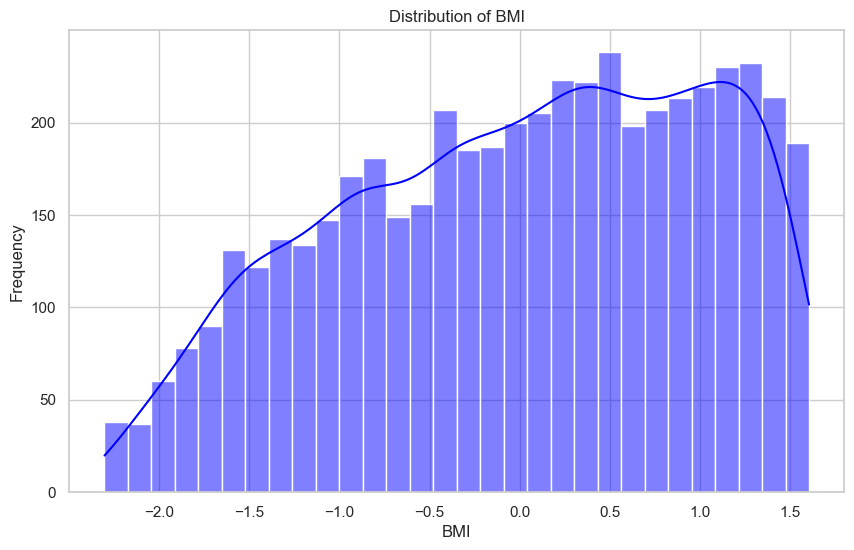

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Body Fat Percentage'], bins=30, kde=True, color='blue')
plt.title('Distribution of Body Fat Percentage')
plt.xlabel('Body Fat Percentage')
plt.ylabel('Frequency')

plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=30, kde=True, color='blue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

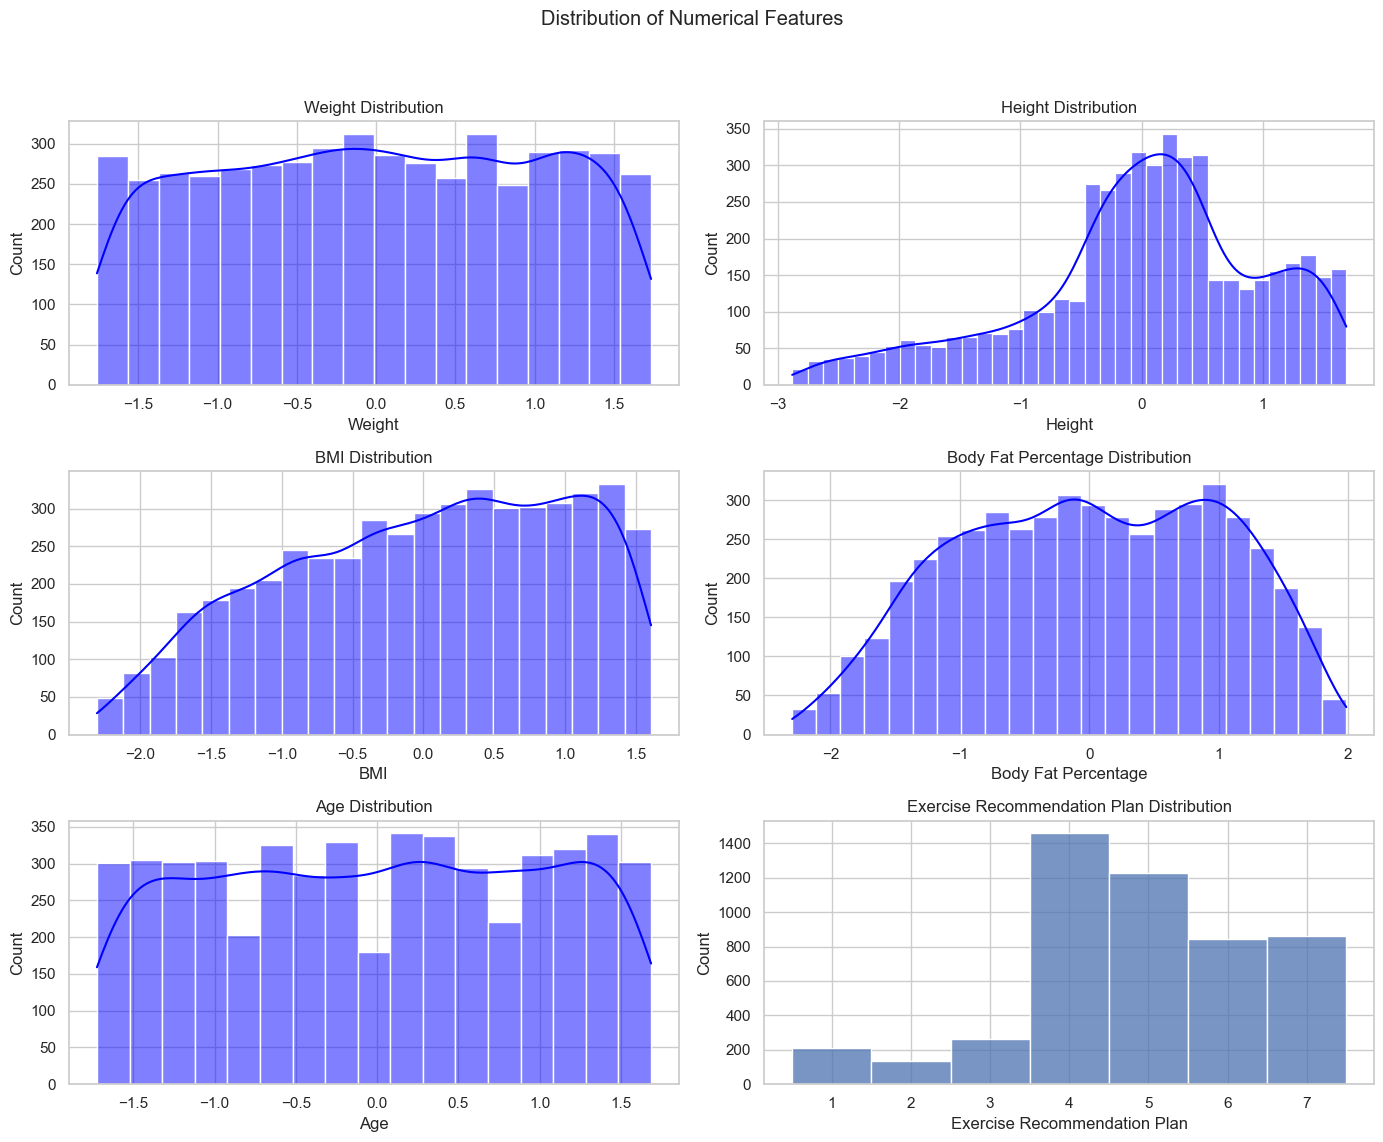

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

fig.suptitle("Distribution of Numerical Features")




sns.histplot(df['Weight'], kde=True, ax=axes[0, 0], color='blue').set_title("Weight Distribution")

sns.histplot(df['Height'], kde=True, ax=axes[0, 1], color='blue').set_title("Height Distribution")

sns.histplot(df['BMI'], kde=True, ax=axes[1, 0], color='blue').set_title("BMI Distribution")

sns.histplot(df['Body Fat Percentage'], kde=True, ax=axes[1, 1], color='blue').set_title("Body Fat Percentage Distribution")

sns.histplot(df['Age'], kde=True, ax=axes[2, 0], color='blue').set_title("Age Distribution")

sns.histplot(df['Exercise Recommendation Plan'], discrete=True, ax=axes[2, 1]).set_title("Exercise Recommendation Plan Distribution")



plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

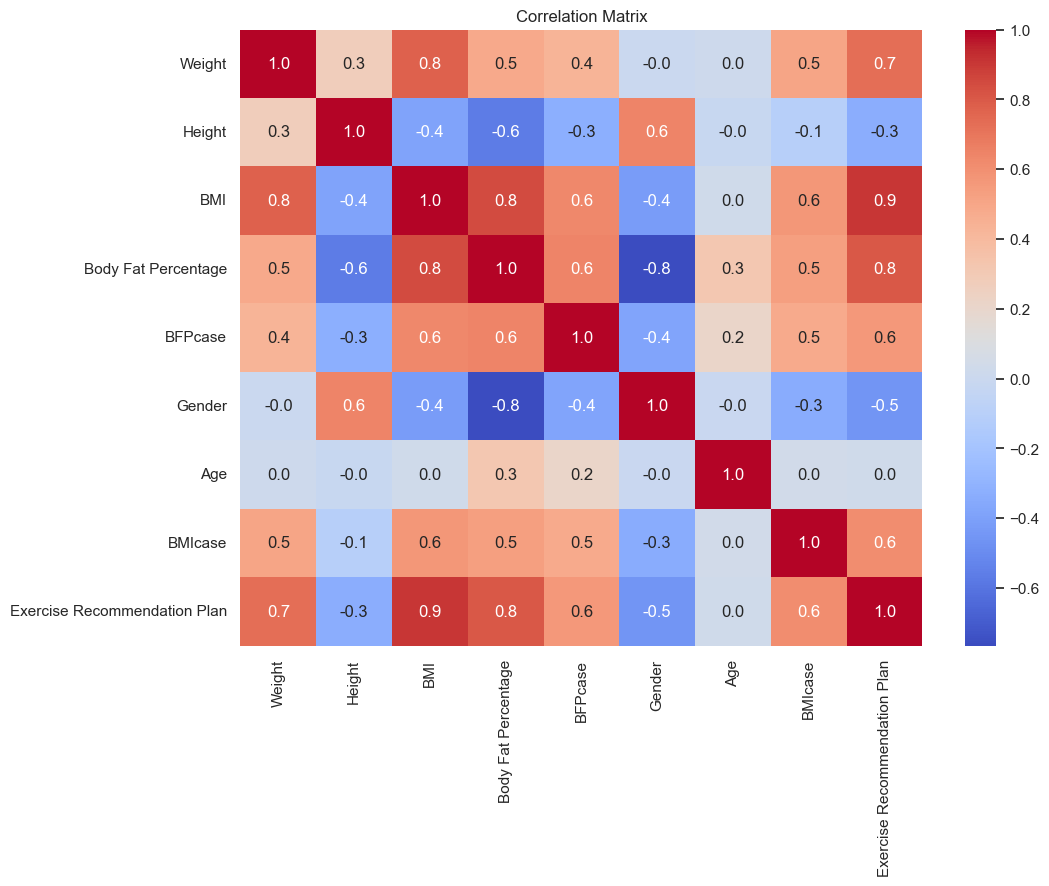

In [13]:
plt.figure(figsize=(11, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix')
plt.show()

## Model Building

In [14]:
df = df.drop(['BFPcase', 'BMIcase'], axis=1)

X = df.drop('Exercise Recommendation Plan', axis=1)

In [15]:
df.head(10)

,Weight,Height,BMI,Body Fat Percentage,Gender,Age,Exercise Recommendation Plan
0,-0.198505,0.450598,-0.504882,-1.082427,1,-0.925599,4
1,-0.145521,1.422264,-0.976563,-1.503616,1,-1.360514,4
2,0.427778,-0.154020,0.504430,1.141343,0,1.104001,5
3,0.539356,-0.033009,0.524277,-0.186672,1,-0.055771,5
4,-0.597584,-0.310940,-0.432967,-1.250589,1,-1.650457,4
5,-1.008451,-2.052992,0.359560,0.391216,0,-1.143056,5
6,-1.551313,0.794377,-1.890757,-1.859461,1,-0.635656,1
7,1.448743,-0.151331,1.531889,1.908299,0,1.538916,7
8,0.435915,0.438639,0.089582,0.925835,0,1.248973,7
9,-0.315819,-0.405959,-0.077482,-0.050078,1,1.683887,5


In [16]:
y = df['Exercise Recommendation Plan'].astype('float')-1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost Classifier': XGBClassifier(),
    'XGBoost Regressor': XGBRegressor()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    print(f"{model_name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.82
Random Forest Accuracy: 0.87
Support Vector Machine Accuracy: 0.84
Decision Tree Accuracy: 0.84
K-Nearest Neighbors Accuracy: 0.81
Naive Bayes Accuracy: 0.84
XGBoost Classifier Accuracy: 0.86
XGBoost Regressor Accuracy: 0.91


### Hyperparameter Optimization

In [17]:
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Decision Tree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'Naive Bayes': {},
    'XGBoost Classifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'XGBoost Regressor': {'max_depth': [3, 4, 5, 6], 'learning_rate': [0.01, 0.1, 0.2, 0.3], 
                            'colsample_bytree': [0.6, 0.8, 1.0], 'gamma': [0, 0.1, 0.2, 0.3]}
}

for model_name, model in models.items():
    if model_name == 'XGBoost Regressor':
        scoring_metric = ['neg_mean_squared_error', 'r2']
    else:
        scoring_metric = ['accuracy', 'r2']

    grid_search = GridSearchCV(model, param_grids[model_name], cv=10, scoring=scoring_metric, refit='r2')
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")


Best parameters for Logistic Regression: {'C': 10, 'solver': 'saga'}
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}
Best parameters for Support Vector Machine: {'C': 10, 'kernel': 'linear'}
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}
Best parameters for K-Nearest Neighbors: {'n_neighbors': 7, 'weights': 'distance'}
Best parameters for Naive Bayes: {}
Best parameters for XGBoost Classifier: {'learning_rate': 0.01, 'n_estimators': 100}
Best parameters for XGBoost Regressor: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 3}


In [18]:
y = df['Exercise Recommendation Plan'] - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(C=10, solver='saga'),
    'Random Forest': RandomForestClassifier(max_depth=10, n_estimators=50),
    'Support Vector Machine': SVC(C=10, kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=5),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=7, weights='distance'),
    'Naive Bayes': GaussianNB(),
    'XGBoost Classifier': XGBClassifier(learning_rate=0.01, n_estimators=100),
    'XGBoost Regressor': XGBRegressor(colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3)
}

print("Accuracies After Optimization")
print("-" * 35)
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    print(f"{model_name} Accuracy: {accuracy:.2f}")

Accuracies After Optimization
-----------------------------------
Logistic Regression Accuracy: 0.85
Random Forest Accuracy: 0.87
Support Vector Machine Accuracy: 0.86
Decision Tree Accuracy: 0.87
K-Nearest Neighbors Accuracy: 0.82
Naive Bayes Accuracy: 0.84
XGBoost Classifier Accuracy: 0.88
XGBoost Regressor Accuracy: 0.93


In [19]:
test_case = X_test.iloc[200].values.reshape(1, -1)
for model_name, model in models.items():
    if model_name == 'XGBoost Regressor':
        print(model.predict(test_case).round())
        continue
    print(model.predict(test_case))

[6]
[6]
[6]
[6]
[6]
[6]
[6]
[6.]


c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNe